# Experiments I - Normal Condition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, ttest_rel
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.8

# Color palette for consistency
colors = {
    'dawn': '#FF6B6B',      # Warm red for 5:00 AM
    'noon': '#4ECDC4',      # Teal for 12:00
    'dusk': '#45B7D1',      # Blue for 5:00 PM
    'midnight': '#2C3E50'   # Dark blue for midnight
}

# Experiment I: Normal circadian entropy data
exp1_data = {
    'P1': {'5:00': 3.929, '12:00': 2.882, '17:00': 4.023, '0:00': 5.819},
    'P2': {'5:00': 5.830, '12:00': 5.351, '17:00': 4.041, '0:00': 5.377},
    'P3': {'5:00': 4.194, '12:00': 3.820, '17:00': 3.691, '0:00': 4.728},
    'P4': {'5:00': 5.880, '12:00': 5.888, '17:00': 4.520, '0:00': 3.898},
    'P5': {'5:00': 5.779, '12:00': 5.254, '17:00': 4.431, '0:00': 4.313},
    'P6': {'5:00': 4.912, '12:00': 5.853, '17:00': 5.771, '0:00': 5.798},
    'P7': {'5:00': 5.757, '12:00': 5.625, '17:00': 4.059, '0:00': 5.829},
    'P8': {'5:00': 5.688, '12:00': 5.405, '17:00': 5.815, '0:00': 5.839}
}

# Core body temperatures (from manuscript)
temperatures = {
    '5:00': 36.607,
    '12:00': 36.834,
    '17:00': 37.023,
    '0:00': 36.681
}

# Convert to DataFrame for easier manipulation
df_exp1 = pd.DataFrame(exp1_data).T
df_exp1 = df_exp1.reset_index()
df_exp1.columns = ['Participant', '5:00', '12:00', '17:00', '0:00']

print("Experiment I - Entropy Values (H(φ)):")
print(df_exp1)
print("\nCore Body Temperatures (°C):")
for time, temp in temperatures.items():
    print(f"  {time}: {temp:.3f}°C")

Experiment I - Entropy Values (H(φ)):
  Participant   5:00  12:00  17:00   0:00
0          P1  3.929  2.882  4.023  5.819
1          P2  5.830  5.351  4.041  5.377
2          P3  4.194  3.820  3.691  4.728
3          P4  5.880  5.888  4.520  3.898
4          P5  5.779  5.254  4.431  4.313
5          P6  4.912  5.853  5.771  5.798
6          P7  5.757  5.625  4.059  5.829
7          P8  5.688  5.405  5.815  5.839

Core Body Temperatures (°C):
  5:00: 36.607°C
  12:00: 36.834°C
  17:00: 37.023°C
  0:00: 36.681°C


In [2]:
# Figure 1: Individual participant entropy patterns across circadian cycle
fig, axes = plt.subplots(2, 4, figsize=(14, 6),dpi=1000)
#fig.suptitle('Individual Entropy Patterns Across Circadian Cycle', fontsize=14, fontweight='bold')

time_points = ['5:00', '12:00', '17:00', '0:00']
time_numeric = [5, 12, 17, 24]  # For plotting

for idx, (participant, row) in enumerate(df_exp1.iterrows()):
    ax = axes[idx // 4, idx % 4]
    
    # Extract entropy values
    entropy_values = [row['5:00'], row['12:00'], row['17:00'], row['0:00']]
    
    # Plot entropy pattern
    ax.plot(time_numeric, entropy_values, 'o-', color='#2E86AB', 
            linewidth=2, markersize=8, markerfacecolor='white', 
            markeredgewidth=2, markeredgecolor='#2E86AB')
    
    # Add temperature reference (normalized for visualization)
    ax2 = ax.twinx()
    temp_values = [temperatures[t] for t in time_points]
    ax2.plot(time_numeric, temp_values, '--', color='#FF6B6B', 
            alpha=0.5, linewidth=1.5, label='Core Temp')
    
    # Formatting
    ax.set_title(f"Participant {idx+1}", fontweight='bold')
    ax.set_xlabel('Circadian Time')
    ax.set_ylabel('Entropy H(φ)', color='#2E86AB')
    ax2.set_ylabel('Temperature (°C)', color='#FF6B6B')
    ax.set_xticks(time_numeric)
    ax.set_xticklabels(['5:00', '12:00', '17:00', '00:00'])
    ax.grid(True, alpha=0.3)
    ax.set_ylim([2, 6.5])
    ax2.set_ylim([36.5, 37.1])
    
    # Color code y-axis labels
    ax.tick_params(axis='y', labelcolor='#2E86AB')
    ax2.tick_params(axis='y', labelcolor='#FF6B6B')

plt.tight_layout()
plt.show()

# Calculate individual statistics
print("\nIndividual Participant Statistics:")
print("-" * 50)
for idx, (participant, row) in enumerate(df_exp1.iterrows()):
    entropy_values = [row['5:00'], row['12:00'], row['17:00'], row['0:00']]
    mean_entropy = np.mean(entropy_values)
    std_entropy = np.std(entropy_values)
    max_time = time_points[np.argmax(entropy_values)]
    min_time = time_points[np.argmin(entropy_values)]
    print(f"P{idx+1}: Mean={mean_entropy:.3f}±{std_entropy:.3f}, "
          f"Peak at {max_time} ({np.max(entropy_values):.3f}), "
          f"Min at {min_time} ({np.min(entropy_values):.3f})")


Individual Participant Statistics:
--------------------------------------------------
P1: Mean=4.163±1.056, Peak at 0:00 (5.819), Min at 12:00 (2.882)
P2: Mean=5.150±0.668, Peak at 5:00 (5.830), Min at 17:00 (4.041)
P3: Mean=4.108±0.403, Peak at 0:00 (4.728), Min at 17:00 (3.691)
P4: Mean=5.046±0.866, Peak at 12:00 (5.888), Min at 0:00 (3.898)
P5: Mean=4.944±0.603, Peak at 5:00 (5.779), Min at 0:00 (4.313)
P6: Mean=5.584±0.389, Peak at 12:00 (5.853), Min at 5:00 (4.912)
P7: Mean=5.317±0.730, Peak at 0:00 (5.829), Min at 17:00 (4.059)
P8: Mean=5.687±0.172, Peak at 0:00 (5.839), Min at 12:00 (5.405)


# Experiments II & III - Thermal Perturbations

In [3]:
# Experiment II: Heat Perturbation - Data Setup
exp2_heat_data = {
    'P1': {'N_5:00': -0.667, 'N_17:00': -0.590, 'Ab_5:00': 0.885, 'Ab_17:00': -0.994},
    'P2': {'N_5:00': 0.887, 'N_17:00': -0.576, 'Ab_5:00': 0.903, 'Ab_17:00': -0.906},
    'P3': {'N_5:00': -0.451, 'N_17:00': -0.862, 'Ab_5:00': -0.012, 'Ab_17:00': -0.595},
    'P4': {'N_5:00': 0.928, 'N_17:00': -0.184, 'Ab_5:00': 0.874, 'Ab_17:00': -2.334},
    'P5': {'N_5:00': 0.845, 'N_17:00': -0.257, 'Ab_5:00': -0.780, 'Ab_17:00': -0.515},
    'P6': {'N_5:00': 0.137, 'N_17:00': 0.839, 'Ab_5:00': 0.915, 'Ab_17:00': -1.089},
    'P7': {'N_5:00': 0.828, 'N_17:00': -0.561, 'Ab_5:00': 0.892, 'Ab_17:00': -0.202},
    'P8': {'N_5:00': 0.771, 'N_17:00': 0.875, 'Ab_5:00': 0.834, 'Ab_17:00': 0.162}
}

# Experiment III: Cold Perturbation - Data Setup
exp3_cold_data = {
    'P1': {'N_5:00': 0.387, 'N_17:00': -1.906, 'Ab_5:00': -0.317, 'Ab_17:00': -1.920},
    'P2': {'N_5:00': 0.735, 'N_17:00': 0.508, 'Ab_5:00': -0.003, 'Ab_17:00': -1.853},
    'P3': {'N_5:00': 0.523, 'N_17:00': -0.418, 'Ab_5:00': 1.050, 'Ab_17:00': -2.004},
    'P4': {'N_5:00': 0.979, 'N_17:00': 0.865, 'Ab_5:00': 0.929, 'Ab_17:00': 0.315},
    'P5': {'N_5:00': 0.314, 'N_17:00': -0.004, 'Ab_5:00': 0.729, 'Ab_17:00': -0.537},
    'P6': {'N_5:00': 0.259, 'N_17:00': 0.442, 'Ab_5:00': 1.057, 'Ab_17:00': -0.027},
    'P7': {'N_5:00': -0.535, 'N_17:00': -1.505, 'Ab_5:00': 0.950, 'Ab_17:00': -0.973},
    'P8': {'N_5:00': 0.574, 'N_17:00': 0.639, 'Ab_5:00': 0.468, 'Ab_17:00': 0.278}
}

# Convert to DataFrames
df_heat = pd.DataFrame(exp2_heat_data).T.reset_index()
df_heat.columns = ['Participant', 'N_5:00', 'N_17:00', 'Ab_5:00', 'Ab_17:00']

df_cold = pd.DataFrame(exp3_cold_data).T.reset_index()
df_cold.columns = ['Participant', 'N_5:00', 'N_17:00', 'Ab_5:00', 'Ab_17:00']

print("Experiment II - Heat Perturbation (Normalized Z-scores):")
print(df_heat)
print("\n" + "="*60)
print("Experiment III - Cold Perturbation (Normalized Z-scores):")
print(df_cold)

Experiment II - Heat Perturbation (Normalized Z-scores):
  Participant  N_5:00  N_17:00  Ab_5:00  Ab_17:00
0          P1  -0.667   -0.590    0.885    -0.994
1          P2   0.887   -0.576    0.903    -0.906
2          P3  -0.451   -0.862   -0.012    -0.595
3          P4   0.928   -0.184    0.874    -2.334
4          P5   0.845   -0.257   -0.780    -0.515
5          P6   0.137    0.839    0.915    -1.089
6          P7   0.828   -0.561    0.892    -0.202
7          P8   0.771    0.875    0.834     0.162

Experiment III - Cold Perturbation (Normalized Z-scores):
  Participant  N_5:00  N_17:00  Ab_5:00  Ab_17:00
0          P1   0.387   -1.906   -0.317    -1.920
1          P2   0.735    0.508   -0.003    -1.853
2          P3   0.523   -0.418    1.050    -2.004
3          P4   0.979    0.865    0.929     0.315
4          P5   0.314   -0.004    0.729    -0.537
5          P6   0.259    0.442    1.057    -0.027
6          P7  -0.535   -1.505    0.950    -0.973
7          P8   0.574    0.639    

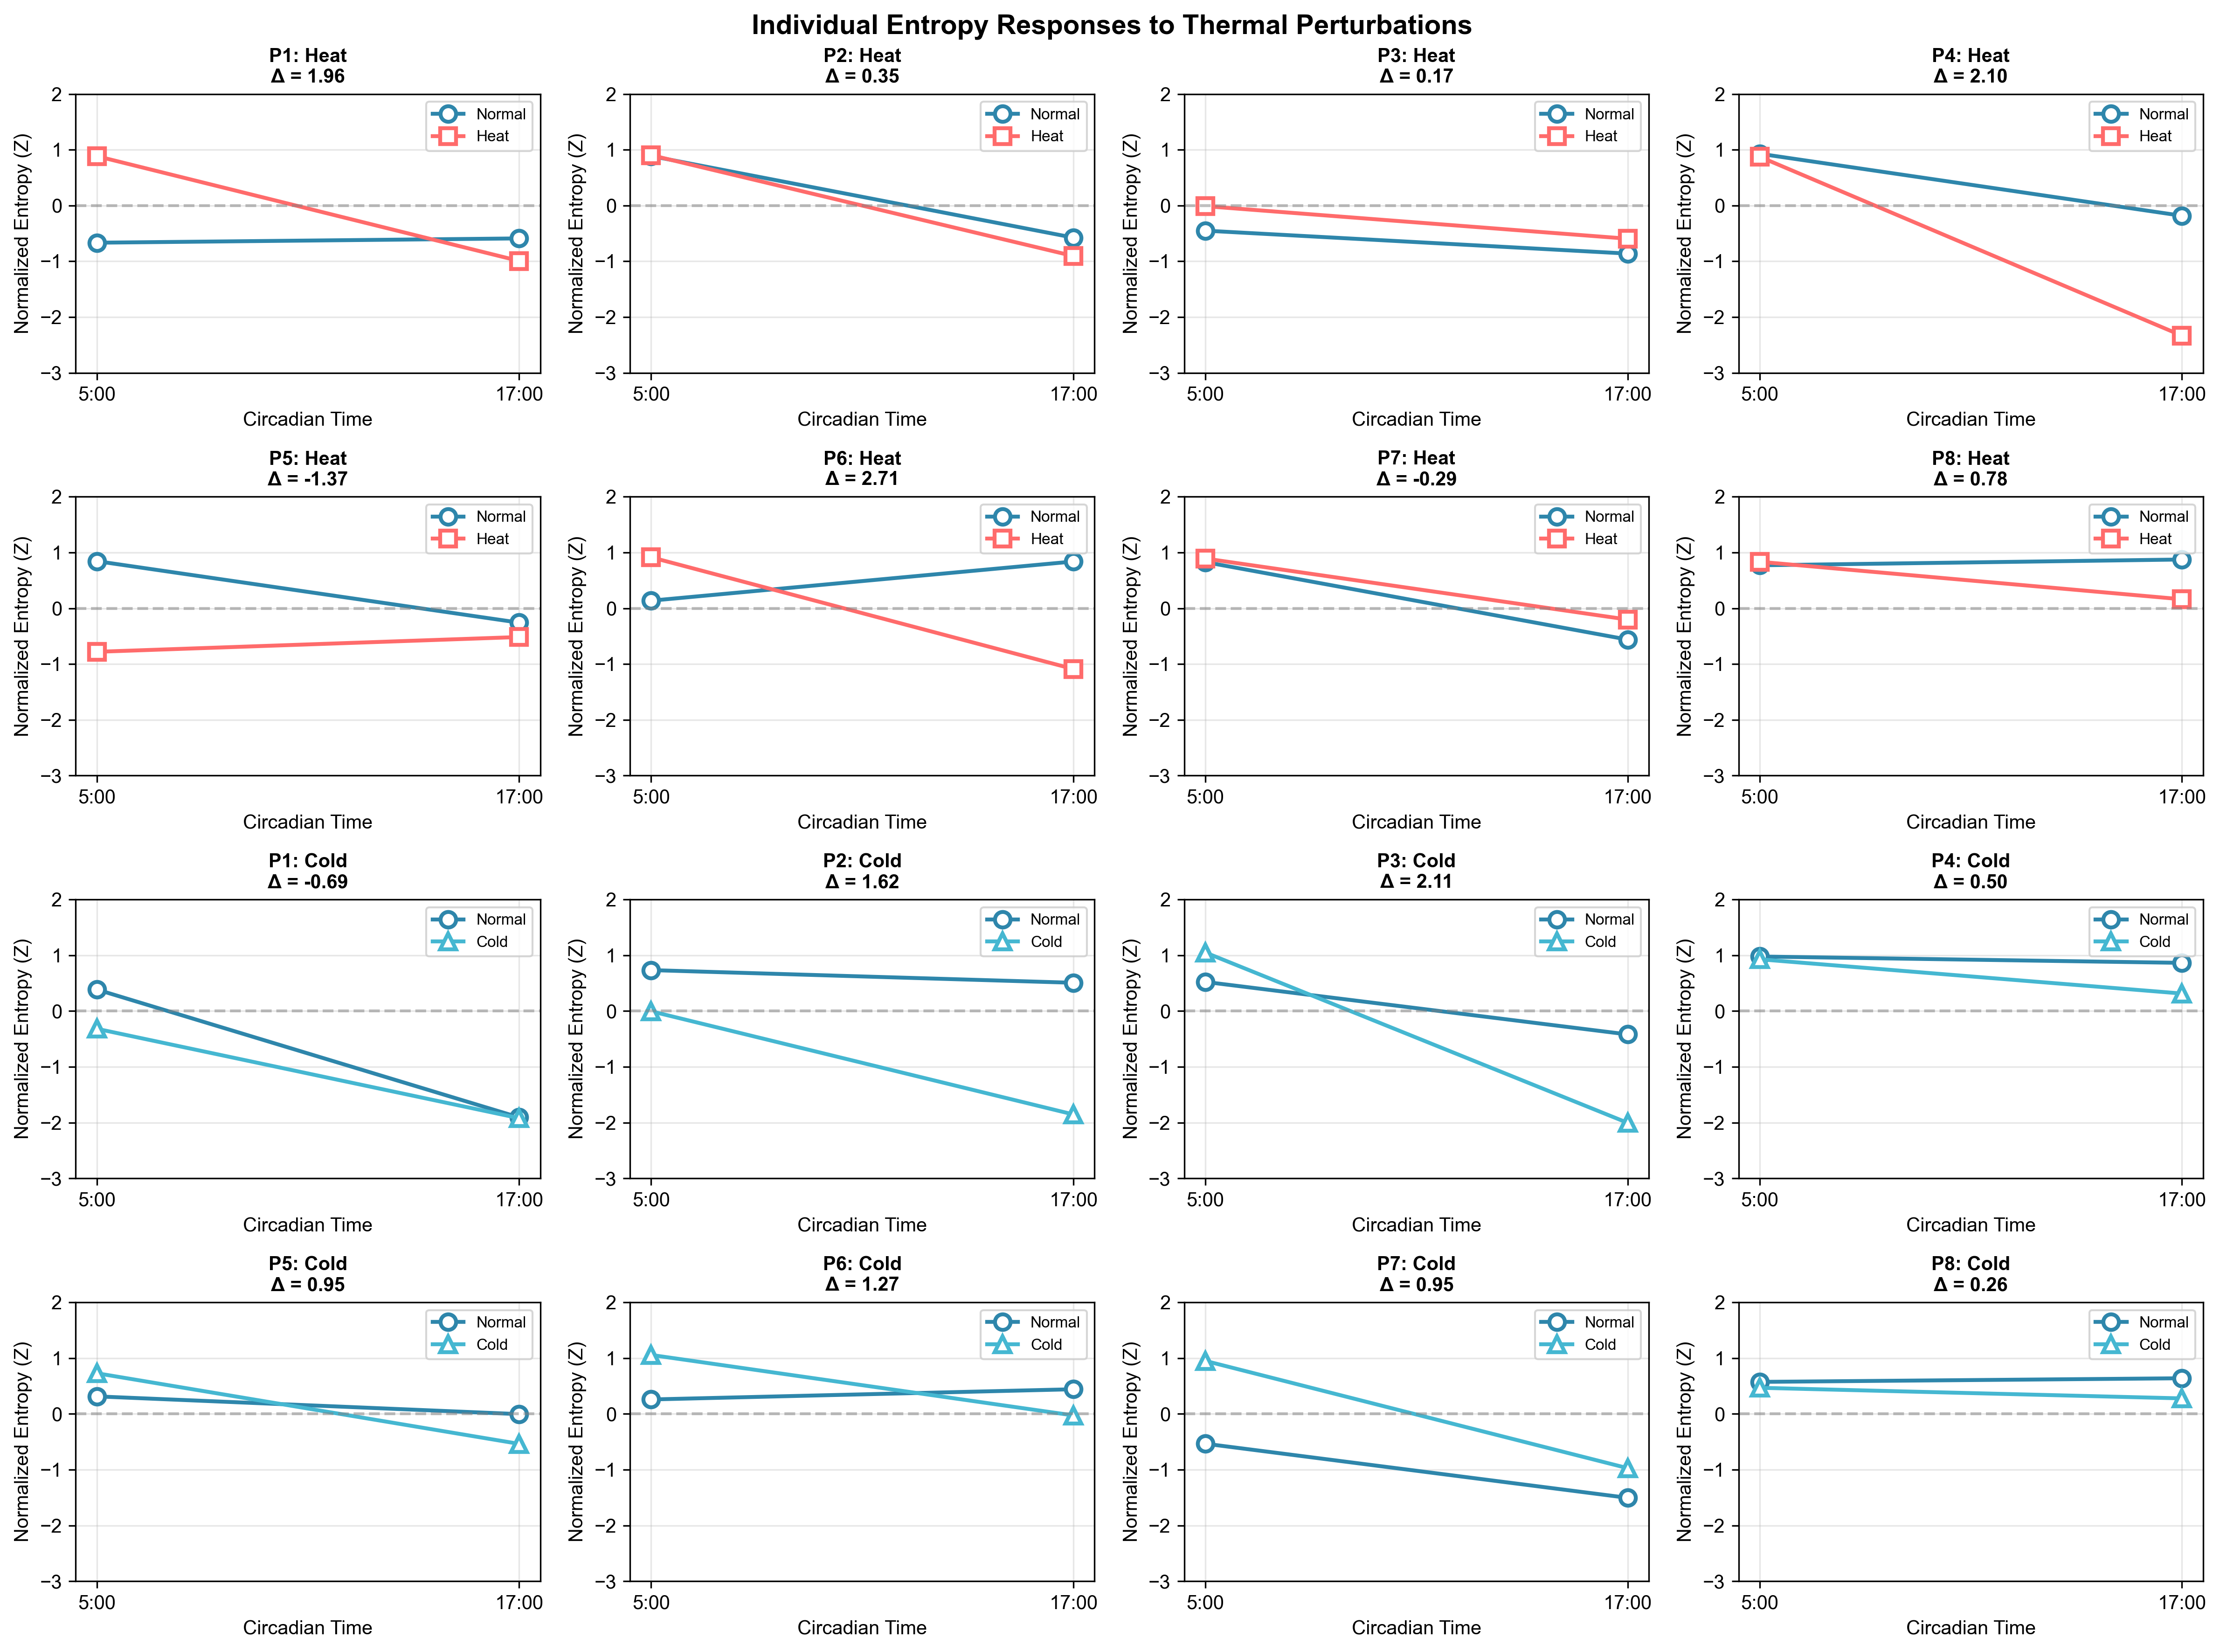

In [4]:
# Figure 3: Individual participant responses to thermal perturbations
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
fig.suptitle('Individual Entropy Responses to Thermal Perturbations', 
             fontsize=14, fontweight='bold')

# Plot heat perturbation responses (top 2 rows)
for idx in range(8):
    ax = axes[idx // 4, idx % 4]
    
    # Extract data for this participant
    participant = f'P{idx+1}'
    heat_normal = [df_heat.iloc[idx]['N_5:00'], df_heat.iloc[idx]['N_17:00']]
    heat_perturbed = [df_heat.iloc[idx]['Ab_5:00'], df_heat.iloc[idx]['Ab_17:00']]
    
    # Plot heat condition
    x = [5, 17]
    ax.plot(x, heat_normal, 'o-', color='#2E86AB', linewidth=2, 
            markersize=8, label='Normal', markerfacecolor='white', markeredgewidth=2)
    ax.plot(x, heat_perturbed, 's-', color='#FF6B6B', linewidth=2, 
            markersize=8, label='Heat', markerfacecolor='white', markeredgewidth=2)
    
    # Calculate interaction effect
    interaction = (heat_perturbed[0] - heat_normal[0]) - (heat_perturbed[1] - heat_normal[1])
    
    ax.set_title(f'{participant}: Heat\nΔ = {interaction:.2f}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Circadian Time')
    ax.set_ylabel('Normalized Entropy (Z)')
    ax.set_xticks([5, 17])
    ax.set_xticklabels(['5:00', '17:00'])
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.legend(loc='best', fontsize=8)
    ax.set_ylim([-3, 2])

# Plot cold perturbation responses (bottom 2 rows)
for idx in range(8):
    ax = axes[(idx // 4) + 2, idx % 4]
    
    # Extract data for this participant
    participant = f'P{idx+1}'
    cold_normal = [df_cold.iloc[idx]['N_5:00'], df_cold.iloc[idx]['N_17:00']]
    cold_perturbed = [df_cold.iloc[idx]['Ab_5:00'], df_cold.iloc[idx]['Ab_17:00']]
    
    # Plot cold condition
    x = [5, 17]
    ax.plot(x, cold_normal, 'o-', color='#2E86AB', linewidth=2, 
            markersize=8, label='Normal', markerfacecolor='white', markeredgewidth=2)
    ax.plot(x, cold_perturbed, '^-', color='#45B7D1', linewidth=2, 
            markersize=8, label='Cold', markerfacecolor='white', markeredgewidth=2)
    
    # Calculate interaction effect
    interaction = (cold_perturbed[0] - cold_normal[0]) - (cold_perturbed[1] - cold_normal[1])
    
    ax.set_title(f'{participant}: Cold\nΔ = {interaction:.2f}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Circadian Time')
    ax.set_ylabel('Normalized Entropy (Z)')
    ax.set_xticks([5, 17])
    ax.set_xticklabels(['5:00', '17:00'])
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.legend(loc='best', fontsize=8)
    ax.set_ylim([-3, 2])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.patches as mpatches

# Set publication quality
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

# Corrected circadian temperature curve function
def create_circadian_curve():
    """Generate properly aligned circadian temperature rhythm curve"""
    hours = np.linspace(0, 24, 200)
    # Align curve: minimum at 5:00, maximum at 17:00
    # Using cosine for better alignment
    mean_temp = 36.815  # Mean of 36.607 and 37.023
    amplitude = 0.208   # Half of (37.023 - 36.607)
    # Cosine function with phase shift to place minimum at 5:00
    temperature = mean_temp - amplitude * np.cos(2 * np.pi * (hours - 5) / 24)
    return hours, temperature

# ========= PLOT 1: Heat Distribution Analysis =========
fig1, ax1 = plt.subplots(1, 1, figsize=(6, 4), dpi=1000)

# Prepare heat data
heat_data_5am_normal = [exp2_heat_data[p]['N_5:00'] for p in exp2_heat_data.keys()]
heat_data_5am_perturbed = [exp2_heat_data[p]['Ab_5:00'] for p in exp2_heat_data.keys()]
heat_data_5pm_normal = [exp2_heat_data[p]['N_17:00'] for p in exp2_heat_data.keys()]
heat_data_5pm_perturbed = [exp2_heat_data[p]['Ab_17:00'] for p in exp2_heat_data.keys()]

positions = [1, 2, 4, 5]
violin_data = [heat_data_5am_normal, heat_data_5am_perturbed, 
               heat_data_5pm_normal, heat_data_5pm_perturbed]

# Create violin plots
parts = ax1.violinplot(violin_data, positions=positions, widths=0.7, 
                       showmeans=False, showmedians=False, showextrema=False)

# New color scheme: Yellow for normal, Red for heat
colors_heat = ['#FFD700', '#DC143C', '#FFD700', '#DC143C']  # Gold for normal, Crimson for heat
alphas = [0.6, 0.7, 0.6, 0.7]

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors_heat[i])
    pc.set_alpha(alphas[i])
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

# Enhanced individual data points
np.random.seed(42)
for i, (pos, data) in enumerate(zip(positions, violin_data)):
    jittered_x = np.random.normal(pos, 0.06, size=len(data))
    if i % 2 == 0:  # Normal condition
        ax1.scatter(jittered_x, data, alpha=0.9, s=70, color='#FFA500', 
                   marker='o', edgecolors='black', linewidth=0.8, zorder=10)
    else:  # Heat condition
        ax1.scatter(jittered_x, data, alpha=0.9, s=70, color='#8B0000', 
                   marker='^', edgecolors='black', linewidth=0.8, zorder=10)

# Add properly normalized circadian temperature curve
ax1_temp = ax1.twinx()
hours, temp = create_circadian_curve()
# Normalize temperature to fit the entropy scale
temp_normalized = (temp - temp.mean()) * 8  # Scale to fit plot range
ax1_temp.plot(hours/4, temp_normalized, '--', color='gray', alpha=0.5, linewidth=2.5, 
             label='Circadian Rhythm')

# Simplified tick marks - only min, 0, max
ax1.set_yticks([-3, 0, 2])
ax1.set_yticklabels(['-3', '0', '2'], fontsize=13)
ax1_temp.set_yticks([temp_normalized.min(), 0, temp_normalized.max()])
ax1_temp.set_yticklabels(['Min', '0', 'Max'], fontsize=12, color='gray')
ax1_temp.set_ylabel('Temperature', fontsize=13, color='gray')

# Vertical lines at circadian points
ax1.axvline(x=1.5, color='#FF6B6B', linestyle='--', linewidth=3, alpha=0.8)
ax1.axvline(x=4.5, color='#6B6BFF', linestyle='--', linewidth=3, alpha=0.8)

# Circadian time annotations
ax1.text(1.5, 2.3, '5:00 AM\n(Tmin)', ha='center', fontsize=12, 
         fontweight='bold', color='#FF6B6B', bbox=dict(boxstyle="round,pad=0.3", 
         facecolor="white", alpha=0.9))
ax1.text(4.5, 2.3, '5:00 PM\n(Tmax)', ha='center', fontsize=12, 
         fontweight='bold', color='#6B6BFF', bbox=dict(boxstyle="round,pad=0.3", 
         facecolor="white", alpha=0.9))

# Box plots overlay
bp1 = ax1.boxplot(violin_data, positions=positions, widths=0.3,
                  patch_artist=False, showfliers=False,
                  boxprops=dict(color='black', linewidth=2),
                  whiskerprops=dict(color='black', linewidth=1.5),
                  capprops=dict(color='black', linewidth=1.5),
                  medianprops=dict(color='darkred', linewidth=3))

ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)
ax1.set_xticks(positions)
ax1.set_xticklabels(['Normal', 'Heat', 'Normal', 'Heat'], fontsize=13)
ax1.set_ylabel('Normalized Entropy (Z-score)', fontsize=13)
#ax1.set_title('Heat Perturbation: Entropy Distribution Analysis', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim([-3.5, 2.5])
ax1.set_xlim([0, 6])

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Normal',
                             markerfacecolor='#FFA500', markersize=10, markeredgecolor='black'),
                  plt.Line2D([0], [0], marker='^', color='w', label='Heat Vest',
                             markerfacecolor='#8B0000', markersize=10, markeredgecolor='black')]
ax1.legend(handles=legend_elements, loc='lower center', fontsize=11, framealpha=0.01)

plt.tight_layout()
#plt.savefig('Figure3A_Heat_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ========= PLOT 2: Heat Individual Response Heatmap =========
fig2, ax2 = plt.subplots(1, 1, figsize=(6, 4), dpi=1000)

heat_matrix = []
participants_list = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
conditions = ['N_5:00', 'Ab_5:00', 'N_17:00', 'Ab_17:00']

for participant in participants_list:
    row = [exp2_heat_data[participant][cond] for cond in conditions]
    heat_matrix.append(row)

heat_matrix = np.array(heat_matrix)

# Create meshgrid for contour
x = np.arange(4)
y = np.arange(8)
X, Y = np.meshgrid(x, y)

xi = np.linspace(0, 3, 100)
yi = np.linspace(0, 7, 100)
Xi, Yi = np.meshgrid(xi, yi)
Zi = griddata((X.flatten(), Y.flatten()), heat_matrix.flatten(), 
              (Xi, Yi), method='cubic')

# Plot contour
contour = ax2.contourf(Xi, Yi, Zi, levels=20, cmap='RdYlBu_r', 
                       vmin=-3, vmax=2, alpha=0.6)
contour_lines = ax2.contour(Xi, Yi, Zi, levels=10, colors='black', 
                            linewidths=0.8, alpha=0.5, linestyles='--')

# Overlay original data
im = ax2.imshow(heat_matrix, cmap='RdYlBu_r', aspect='auto', 
                vmin=-3, vmax=2, alpha=0.9, interpolation='bilinear')

# Enhanced grid lines
ax2.axvline(x=1.5, color='black', linestyle='-', linewidth=3, alpha=0.8)
ax2.axvline(x=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.6)
ax2.axvline(x=2.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.6)

# Add horizontal grid lines
for i in range(1, 8):
    ax2.axhline(y=i-0.5, color='gray', linestyle=':', linewidth=0.5, alpha=0.4)

# Value annotations
for i in range(8):
    for j in range(4):
        value = heat_matrix[i, j]
        text_color = "white" if abs(value) > 1.2 else "black"
        text_weight = 'bold' if abs(value) > 1.5 else 'normal'
        ax2.text(j, i, f'{value:.2f}', ha="center", va="center", 
                color=text_color, fontsize=11, fontweight=text_weight)

ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(['Normal\n5:00 AM', 'Heat\n5:00 AM', 
                     'Normal\n5:00 PM', 'Heat\n5:00 PM'], fontsize=12)
ax2.set_yticks(range(8))
ax2.set_yticklabels(participants_list, fontsize=12)
#ax2.set_title('Heat Perturbation: Individual Response Patterns', fontsize=14, fontweight='bold')
ax2.set_xlabel('Condition × Circadian Time', fontsize=13)
ax2.set_ylabel('Participants', fontsize=13)

# Simplified colorbar with only min, 0, max
cbar = plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
cbar.set_ticks([-3, 0, 2])
cbar.set_ticklabels(['-3', '0', '2'], fontsize=12)
cbar.set_label('Z-score', fontsize=13)

plt.tight_layout()
#plt.savefig('Figure3B_Heat_Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ========= PLOT 3: Cold Distribution Analysis =========
fig3, ax3 = plt.subplots(1, 1, figsize=(6, 4), dpi=1000)

cold_data_5am_normal = [exp3_cold_data[p]['N_5:00'] for p in exp3_cold_data.keys()]
cold_data_5am_perturbed = [exp3_cold_data[p]['Ab_5:00'] for p in exp3_cold_data.keys()]
cold_data_5pm_normal = [exp3_cold_data[p]['N_17:00'] for p in exp3_cold_data.keys()]
cold_data_5pm_perturbed = [exp3_cold_data[p]['Ab_17:00'] for p in exp3_cold_data.keys()]

violin_data_cold = [cold_data_5am_normal, cold_data_5am_perturbed, 
                   cold_data_5pm_normal, cold_data_5pm_perturbed]

parts_cold = ax3.violinplot(violin_data_cold, positions=positions, widths=0.7,
                            showmeans=False, showmedians=False, showextrema=False)

# New color scheme: Yellow for normal, Blue for cold
colors_cold = ['#FFD700', '#1E90FF', '#FFD700', '#1E90FF']  # Gold for normal, DodgerBlue for cold
alphas_cold = [0.6, 0.7, 0.6, 0.7]

for i, pc in enumerate(parts_cold['bodies']):
    pc.set_facecolor(colors_cold[i])
    pc.set_alpha(alphas_cold[i])
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

# Enhanced individual data points
np.random.seed(42)
for i, (pos, data) in enumerate(zip(positions, violin_data_cold)):
    jittered_x = np.random.normal(pos, 0.06, size=len(data))
    if i % 2 == 0:  # Normal condition
        ax3.scatter(jittered_x, data, alpha=0.9, s=70, color='#FFA500', 
                   marker='o', edgecolors='black', linewidth=0.8, zorder=10)
    else:  # Cold condition
        ax3.scatter(jittered_x, data, alpha=0.9, s=70, color='#000080', 
                   marker='v', edgecolors='black', linewidth=0.8, zorder=10)

# Add circadian temperature curve
ax3_temp = ax3.twinx()
ax3_temp.plot(hours/4, temp_normalized, '--', color='gray', alpha=0.5, linewidth=2.5)

# Simplified tick marks
ax3.set_yticks([-3, 0, 2])
ax3.set_yticklabels(['-3', '0', '2'], fontsize=13)
ax3_temp.set_yticks([temp_normalized.min(), 0, temp_normalized.max()])
ax3_temp.set_yticklabels(['Min', '0', 'Max'], fontsize=12, color='gray')
ax3_temp.set_ylabel('Temperature', fontsize=13, color='gray')

# Vertical lines at circadian points
ax3.axvline(x=1.5, color='#FF6B6B', linestyle='--', linewidth=3, alpha=0.8)
ax3.axvline(x=4.5, color='#6B6BFF', linestyle='--', linewidth=3, alpha=0.8)

# Circadian time annotations
ax3.text(1.5, 2.3, '5:00 AM\n(Tmin)', ha='center', fontsize=12, 
         fontweight='bold', color='#FF6B6B', bbox=dict(boxstyle="round,pad=0.3", 
         facecolor="white", alpha=0.9))
ax3.text(4.5, 2.3, '5:00 PM\n(Tmax)', ha='center', fontsize=12, 
         fontweight='bold', color='#6B6BFF', bbox=dict(boxstyle="round,pad=0.3", 
         facecolor="white", alpha=0.9))

# Box plots overlay
bp2 = ax3.boxplot(violin_data_cold, positions=positions, widths=0.3,
                  patch_artist=False, showfliers=False,
                  boxprops=dict(color='black', linewidth=2),
                  whiskerprops=dict(color='black', linewidth=1.5),
                  capprops=dict(color='black', linewidth=1.5),
                  medianprops=dict(color='darkblue', linewidth=3))

ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)
ax3.set_xticks(positions)
ax3.set_xticklabels(['Normal', 'Cold', 'Normal', 'Cold'], fontsize=13)
ax3.set_ylabel('Normalized Entropy (Z-score)', fontsize=13)
#ax3.set_title('Cold Perturbation: Entropy Distribution Analysis', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim([-3.5, 2.5])
ax3.set_xlim([0, 6])

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Normal',
                             markerfacecolor='#FFA500', markersize=10, markeredgecolor='black'),
                  plt.Line2D([0], [0], marker='v', color='w', label='Ice Vest',
                             markerfacecolor='#000080', markersize=10, markeredgecolor='black')]
ax3.legend(handles=legend_elements, loc='lower center', fontsize=11, framealpha=0.01)

plt.tight_layout()
#plt.savefig('Figure4A_Cold_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ========= PLOT 4: Cold Individual Response Heatmap =========
fig4, ax4 = plt.subplots(1, 1, figsize=(6, 4), dpi=1000)

cold_matrix = []
for participant in participants_list:
    row = [exp3_cold_data[participant][cond] for cond in conditions]
    cold_matrix.append(row)

cold_matrix = np.array(cold_matrix)

Zi_cold = griddata((X.flatten(), Y.flatten()), cold_matrix.flatten(), 
                   (Xi, Yi), method='cubic')

# Plot contour
contour_cold = ax4.contourf(Xi, Yi, Zi_cold, levels=20, cmap='RdYlBu_r', 
                            vmin=-3, vmax=2, alpha=0.6)
contour_lines_cold = ax4.contour(Xi, Yi, Zi_cold, levels=10, colors='black', 
                                 linewidths=0.8, alpha=0.5, linestyles='--')

# Overlay original data
im_cold = ax4.imshow(cold_matrix, cmap='RdYlBu_r', aspect='auto', 
                     vmin=-3, vmax=2, alpha=0.9, interpolation='bilinear')

# Enhanced grid lines
ax4.axvline(x=1.5, color='black', linestyle='-', linewidth=3, alpha=0.8)
ax4.axvline(x=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.6)
ax4.axvline(x=2.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.6)

for i in range(1, 8):
    ax4.axhline(y=i-0.5, color='gray', linestyle=':', linewidth=0.5, alpha=0.4)

# Value annotations
for i in range(8):
    for j in range(4):
        value = cold_matrix[i, j]
        text_color = "white" if abs(value) > 1.2 else "black"
        text_weight = 'bold' if abs(value) > 1.5 else 'normal'
        ax4.text(j, i, f'{value:.2f}', ha="center", va="center", 
                color=text_color, fontsize=11, fontweight=text_weight)

ax4.set_xticks([0, 1, 2, 3])
ax4.set_xticklabels(['Normal\n5:00 AM', 'Cold\n5:00 AM', 
                     'Normal\n5:00 PM', 'Cold\n5:00 PM'], fontsize=12)
ax4.set_yticks(range(8))
ax4.set_yticklabels(participants_list, fontsize=12)
#ax4.set_title('Cold Perturbation: Individual Response Patterns', fontsize=14, fontweight='bold')
ax4.set_xlabel('Condition × Circadian Time', fontsize=13)
ax4.set_ylabel('Participants', fontsize=13)

# Simplified colorbar
cbar2 = plt.colorbar(im_cold, ax=ax4, fraction=0.046, pad=0.04)
cbar2.set_ticks([-3, 0, 2])
cbar2.set_ticklabels(['-3', '0', '2'], fontsize=12)
cbar2.set_label('Z-score', fontsize=13)

plt.tight_layout()
#plt.savefig('Figure4B_Cold_Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()